![](https://images.pexels.com/photos/716966/pexels-photo-716966.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260)

# Data Mining GPS Tracks

Kevin J. Walchko

24 Apr 2020

---

## Data Set Information:

[![](https://archive.ics.uci.edu/ml/assets/logo.gif)](https://archive.ics.uci.edu/ml/datasets/GPS+Trajectories)

<table border="1" cellpadding="6">
	<tbody><tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">163</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Computer</p></td>
	</tr>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
		<td><p class="normal">Real</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
		<td><p class="normal">15</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
		<td><p class="normal">2016-02-29</p></td>
	</tr>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification, Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">Yes</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">103485</p></td>
	</tr></tbody>
</table>


The dataset is composed by two tables. The first table `go_track_tracks` presents general attributes and each instance has one trajectory that is represented by the table `go_track_trackspoints`.


### Attribute Information:

1. `go_track_tracks.csv`: a list of trajectories
    - id_android - it represents the device used to capture the instance;
    - speed - it represents the average speed (Km/H)
    - distance - it represent the total distance (Km)
    - rating - it is an evaluation parameter. Evaluation the traffic is a way to verify the volunteers perception about the traffic during the travel, in other words, if volunteers move to some place and face traffic jam, maybe they will evaluate 'bad'. (3- good, 2- normal, 1-bad).
    - rating_bus - it is other evaluation parameter. (1 - The amount of people inside the bus is little, 2 - The bus is not crowded, 3- The bus is crowded.
    - rating_weather - it is another evaluation parameter. ( 2- sunny, 1- raining).
    - car_or_bus - (1 - car, 2-bus)
    - linha - information about the bus that does the pathway
2. `go_track_trackspoints.csv`: localization points of each trajectory
    - id: unique key to identify each point
    - latitude: latitude from where the point is
    - longitude: longitude from where the point is
    - track_id: identify the trajectory which the point belong
    - time: datetime when the point was collected (GMT-3)

[Data](https://archive.ics.uci.edu/ml/datasets/GPS+Trajectories)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [137]:
df = pd.read_csv("GPS-Trajectory/go_track_trackspoints.csv")
df.head(10)

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


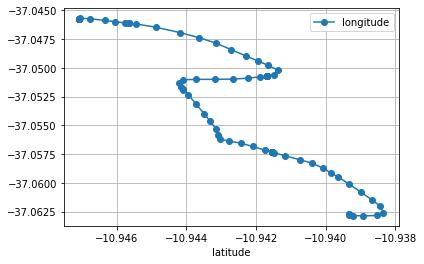

In [125]:
# Let's plot the first track and see what it looks like
first = df[df["track_id"] == 1]
first.plot(x="latitude", y="longitude", grid=True, marker='o');

In [55]:
# let's see how many points are in this column of data
df[df["track_id"]==1]["id"].count()

90

In [61]:
# Let's find some of the longer tracks
m=df.groupby("track_id")["id"].count()
m.sort_values(ascending=False)

track_id
30       646
31       646
41       433
37962    410
27       401
        ... 
37998      1
71         1
38030      1
171        1
159        1
Name: id, Length: 163, dtype: int64

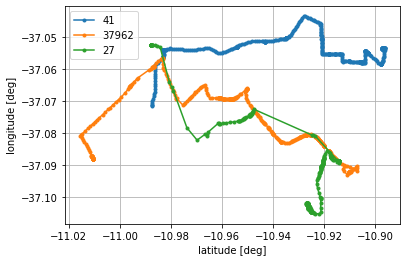

In [73]:
# Let's plot some tracks, 30/31 are separate from the rest, so
# we won't plot them. Just focus on these 3 tracks.
# You can see the data has gaps in GPS coverage with big distances
# just shown as a straight line
fig = plt.figure()
for i in [41,37962,27]:
    y = df[df["track_id"] == i]
    plt.plot(y["latitude"], y["longitude"], label=str(i), marker=".")
plt.grid(True)
plt.legend()
plt.ylabel("longitude [deg]")
plt.xlabel("latitude [deg]");

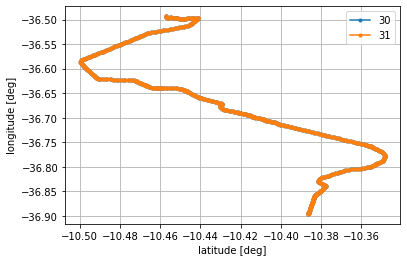

In [135]:
# These tracks appeart to be duplicates or 2 people travelling together
fig = plt.figure()
for i in [30,31]:
    y = df[df["track_id"] == i]
    plt.plot(y["latitude"], y["longitude"], label=str(i), marker=".")
plt.grid(True)
plt.legend()
plt.ylabel("longitude [deg]")
plt.xlabel("latitude [deg]");

# Todo

What I want to do find a way to pull a random track from this bunch, say it is "ground truth" and try to match it to the correct track it came from **efficiently**. Not sure how to do that other than bruit force.